In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset= pd.read_csv("Train.csv")
df=dataset
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 1. Basic Details of Data

In [253]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Categorical Variables

In [5]:
#check categorical variables
cat_col=[]
for x in dataset.dtypes.index:
    if dataset.dtypes[x]=="object":
        cat_col.append(x)
for col in cat_col:
    print(col)
    print(dataset[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

#### Value/Data correction in Item_Fat_Content column

In [92]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [93]:
df.loc[(df['Item_Fat_Content']=='LF') | (df['Item_Fat_Content']=='low fat') | (df['Item_Fat_Content']=='LOW'),'Item_Fat_Content']='Low Fat'
df.loc[(df['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

# 2. Data Cleaning

## Null Values

In [3]:
df.isnull().sum()
# round(dataset.isnull().sum()*100/len(dataset),2)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Item Weight missing values replaced ==> Mean

In [5]:
df["Item_Weight"].mean()

12.857645184135976

In [6]:
df["Item_Weight"]=df[["Item_Weight"]].fillna(df["Item_Weight"].mean())

#### Outlet Size missing values replaced ==> Mode with respect to outlet type

In [7]:
new=df[["Outlet_Size","Outlet_Type"]]
new

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1
...,...,...
8518,High,Supermarket Type1
8519,NaN,Supermarket Type1
8520,Small,Supermarket Type1
8521,Medium,Supermarket Type2


In [8]:
mode_val=new.pivot_table(index='Outlet_Type', aggfunc=(lambda x: x.mode()))
mode_val

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [9]:
missing=df["Outlet_Size"].isnull()
df.loc[missing, "Outlet_Size"]=df.loc[missing, "Outlet_Type"].apply(lambda x: mode_val.loc[x])

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outliers

<Axes: >

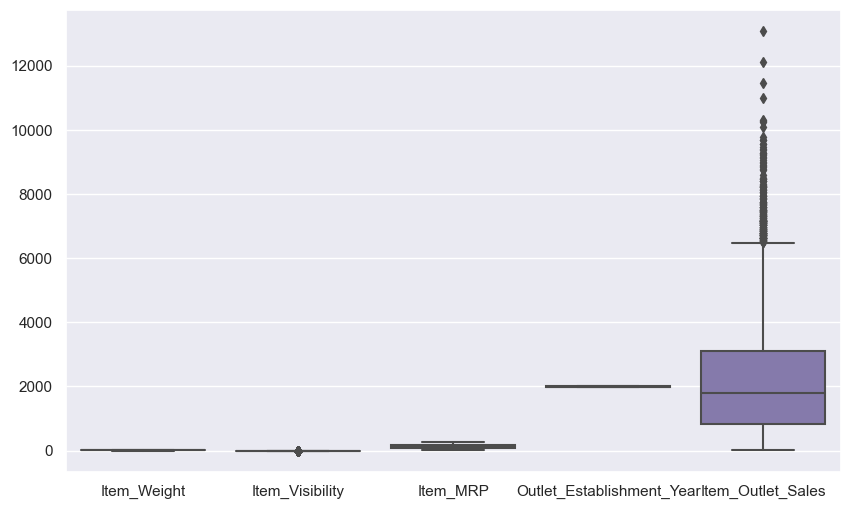

In [266]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(df)

- No visible outliers.
- Item sales expected to have outliers as some items are very expensive

# 3. EDA


### 1) Are items that are more visible, also more sold?

In [235]:
# Items with zero visibility
(df.Item_Visibility==0).sum()*100/len(df)

6.1715358441863195

In [5]:
# are they still getting sold??
df[df.Item_Visibility==0].Item_Outlet_Sales.sum()

1169057.5802

Items with zero visibility don't make sense, especially when they are being sold irrespective of zero visibility

Inference w.r.t data??

In [236]:
# df1.drop(df1.index([df1["Item_Visibility"]==0]))
df=df.drop(df[df["Item_Visibility"]==0].index)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

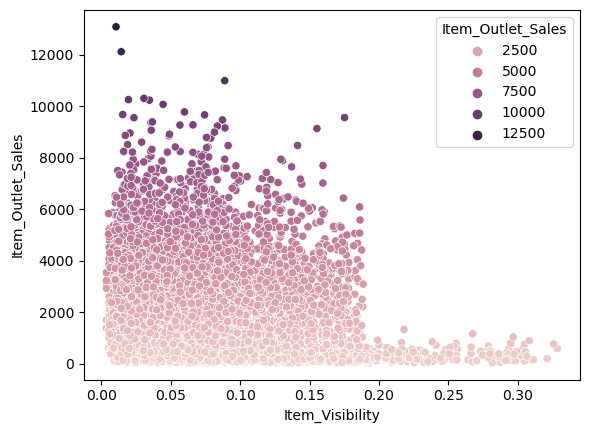

In [8]:
# dataset[["Item_Visibility", "Item_Outlet_Sales"]].plot.scatter(x=0, y=1)
sns.scatterplot(data=df,x="Item_Visibility", y="Item_Outlet_Sales", hue="Item_Outlet_Sales")

#### Result
- No Relation
- People buy what they want to irrespective of the visibility

### 2) Which items are sold the most?

<Axes: >

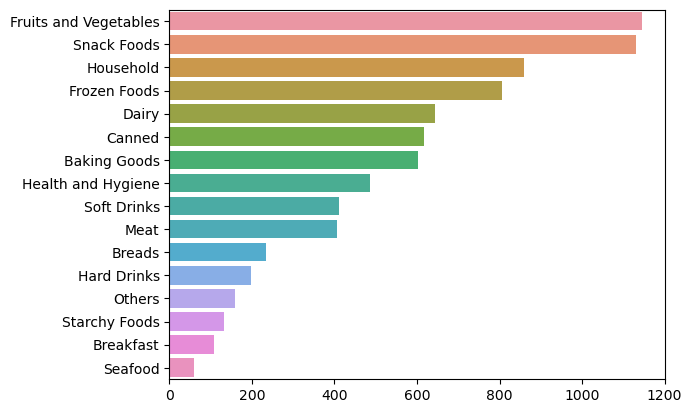

In [242]:
items=df.Item_Type.value_counts()
sns.barplot( y=items.index, x=items.values)

- Fruits and Vegetables are sold the most
- Seafood is sold the least

### 3) Is the oldest Outlet the one with most sales?

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

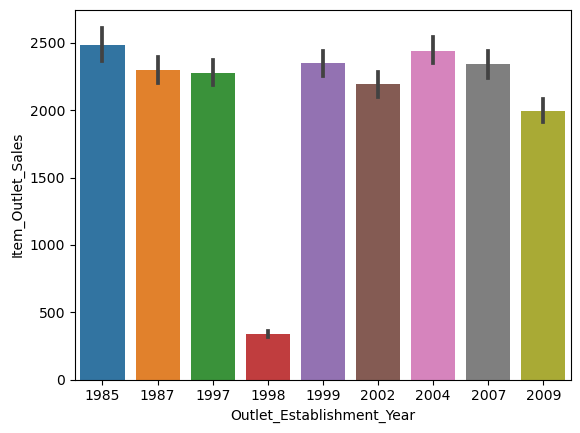

In [26]:
sns.barplot(data=df, y=df.Item_Outlet_Sales, x=df.Outlet_Establishment_Year)

In [21]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [47]:
data=df[["Outlet_Establishment_Year","Item_Outlet_Sales"]].groupby(by="Outlet_Establishment_Year").sum().reset_index()
data.iloc[:,1]

0    3.633620e+06
1    2.142664e+06
2    2.118395e+06
3    1.883402e+05
4    2.183970e+06
5    2.036725e+06
6    2.268123e+06
7    2.167465e+06
8    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

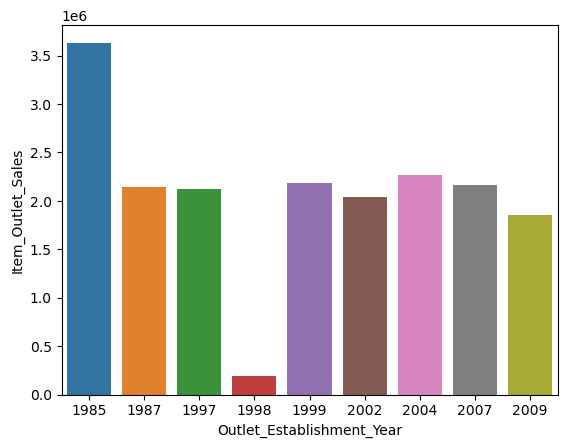

In [48]:
sns.barplot(data, x=data.iloc[:,0], y=data.iloc[:,1] )

#### RESULT
- The oldest store has the highest sales (1985)
- Why 1998 oulet sales so low?
- 1. Are the items there are less?
- 2. Do people not like it only?

Difference between the two graphs??

In [54]:
df[["Outlet_Establishment_Year","Item_Identifier"]].groupby(by="Outlet_Establishment_Year").count()

,Item_Identifier
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


##### Reason
Yes there are less items. That's why 1998 sales are also low.

### 4) Do people buy low fat products more?

In [103]:
fat=df.Item_Fat_Content.value_counts().reset_index()
fat.iloc[:,0]

0    Low Fat
1    Regular
Name: index, dtype: object

([<matplotlib.patches.Wedge at 0x22054bf2650>,
 [Text(-0.4910806225038549, 0.9842966129176847, 'Low Fat'),
  Text(0.4910806225038548, -0.9842966129176849, 'Regular')],
 [Text(-0.2678621577293754, 0.5368890615914643, '64.73%'),
  Text(0.2678621577293753, -0.5368890615914644, '35.27%')])

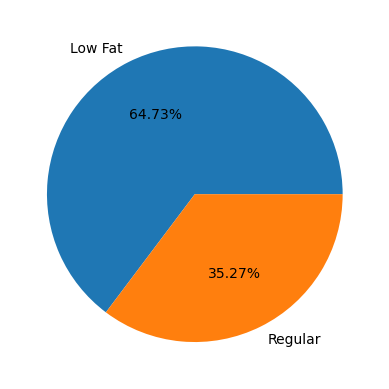

In [108]:
plt.pie(fat.iloc[:,1], labels=fat.iloc[:,0], autopct="%0.2f%%")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1852\390807457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fat_sales=df.groupby("Item_Fat_Content").sum()["Item_Outlet_Sales"]


Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

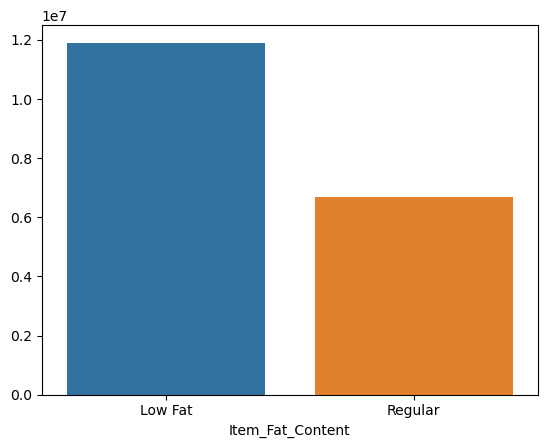

In [124]:
fat_sales=df.groupby("Item_Fat_Content").sum()["Item_Outlet_Sales"]
sns.barplot(x=fat_sales.index, y= fat_sales.values)
fat_sales

#### Result
- People are health consious and buy low fat products more

### 5) Which outlet size have most sales?

#### Expected - Positive Relationship

In [304]:
x.pivot_table(index="Outlet_Size", aggfunc='mean')

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1867.182814


<Axes: xlabel='Outlet_Size'>

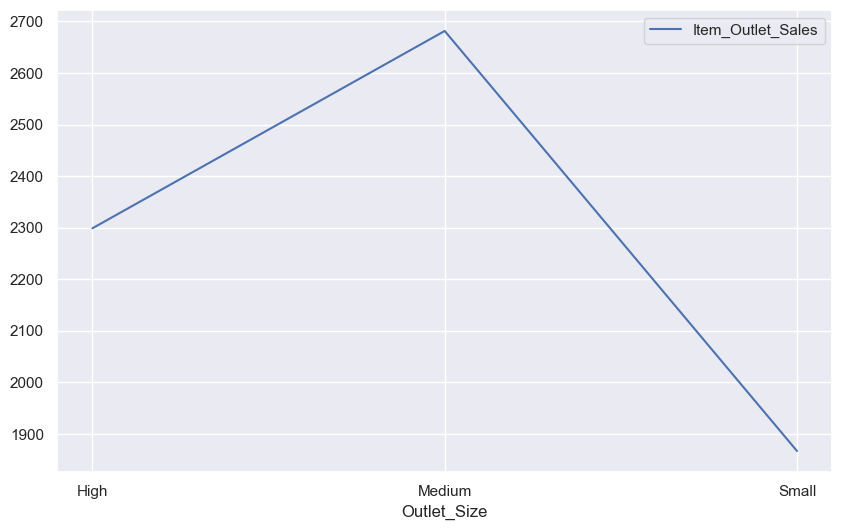

In [303]:
sns.lineplot(x.pivot_table(index="Outlet_Size", aggfunc='mean'))

In [297]:
df.Outlet_Size.value_counts()

Small     4509
Medium    2615
High       873
Name: Outlet_Size, dtype: int64

#### Result 
- Medium sized stores have the highest item sales
- Small sized stores are more in number than medium and high combined

### 6) Which Tier has most sales?

In [163]:
tier_sales=dataset[["Outlet_Location_Type","Item_Outlet_Sales"]].groupby(by="Outlet_Location_Type").sum().reset_index()
tier_sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

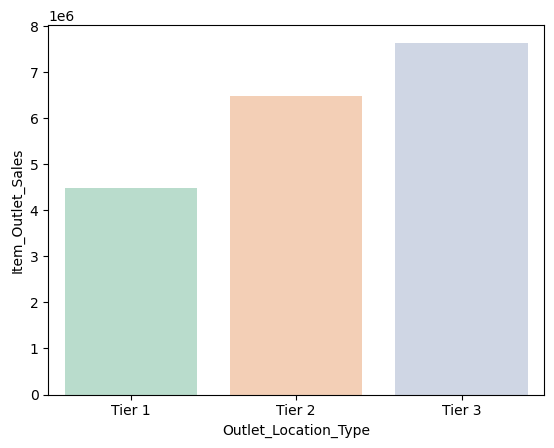

In [180]:
pal=sns.color_palette("rocket", as_cmap=True)
sns.barplot(tier_sales, x=tier_sales.Outlet_Location_Type, y=tier_sales.Item_Outlet_Sales, palette="Pastel2")

In [156]:
city=df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]].reset_index()
df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1852\1986567131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city=df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]].reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1852\1986567131.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]]


Item_Outlet_Sales
Outlet_Location_Type Outlet_Type                         
Tier 1               Grocery Store           1.796941e+05
                     Supermarket Type1       4.302365e+06
Tier 2               Supermarket Type1       6.472314e+06
Tier 3               Grocery Store           1.883402e+05
                     Supermarket Type1       2.142664e+06
                     Supermarket Type2       1.851823e+06
                     Supermarket Type3       3.453926e+06

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

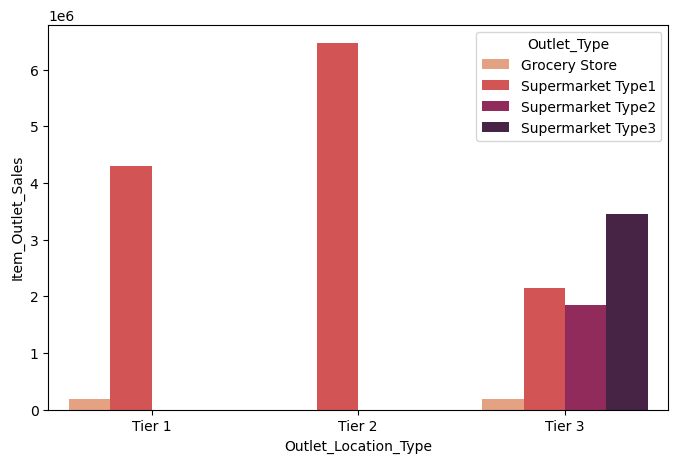

In [186]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(city, hue=city.Outlet_Type, x=city.Outlet_Location_Type, y=city.Item_Outlet_Sales, ax=ax, palette="rocket_r")

#### Result
- Tier 3 has the highest sales
- Sales Outlet wise is distributed for tier 3 (In all 4 types of stores) and concentrated for tier 2 (In just 1 store)
- Tier 3 is probably metro city and Tier 1 is town area

### 7) Do people prefer light items or heavy?

In [215]:
df.Item_Weight.mean()

12.857645184135976

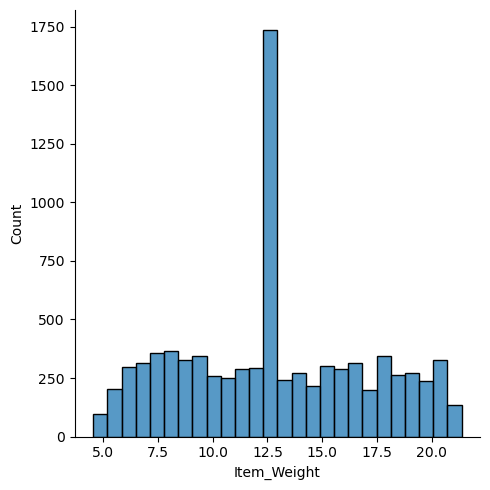

In [201]:
sns.displot(df.Item_Weight)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

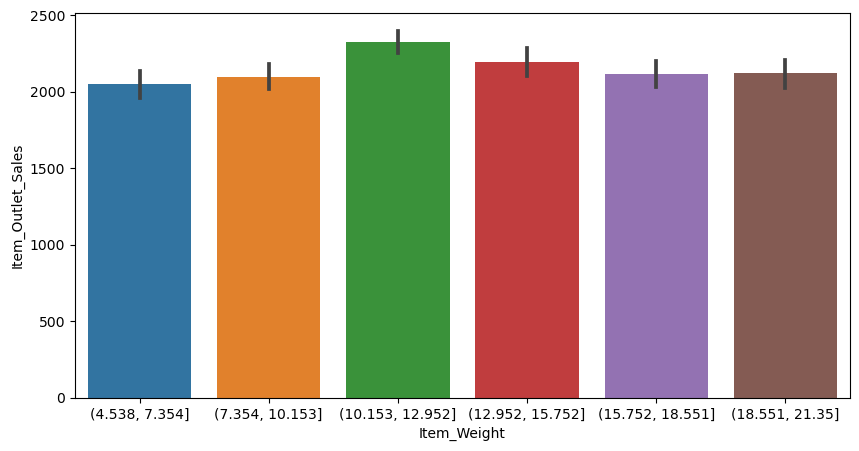

In [232]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df,x=pd.cut(df.Item_Weight, bins=6), y=df.Item_Outlet_Sales, ax=ax)

#### Result
- Most of the data is distributed around the mean => Normal distibution
- People buy all kinds of product, light as well as heavy

# Pandas Profiling

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from ydata_profiling import ProfileReport

df = pd.DataFrame(dataset)
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_file("your_report.html")